In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

#Exercise 1: Image Processing with PIL (lenna_image.png)

1. Read and display the image

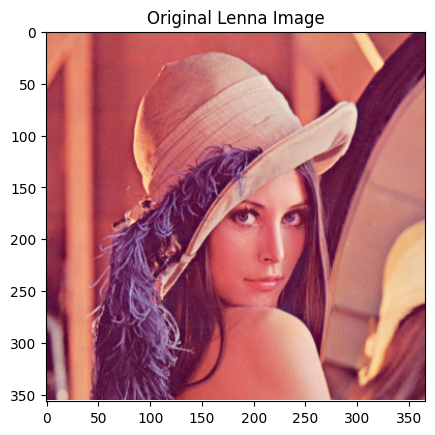

In [3]:
image_path = "lenna_image.png"
img = Image.open('/content/drive/MyDrive/Artificial Intelligence and Machine Learning./lenna_image.png')
plt.imshow(img)
plt.title("Original Lenna Image")
plt.show()


2. Display only the top left corner of 100x100 pixels

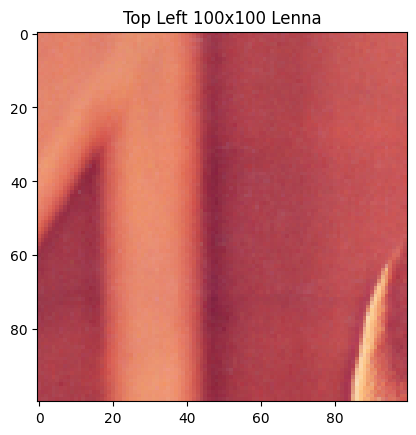

In [4]:
img_array = np.array(img)
top_left = img_array[:100, :100]
plt.imshow(top_left)
plt.title("Top Left 100x100 Lenna")
plt.show()

 3. Show the three color channels (R, G, B)

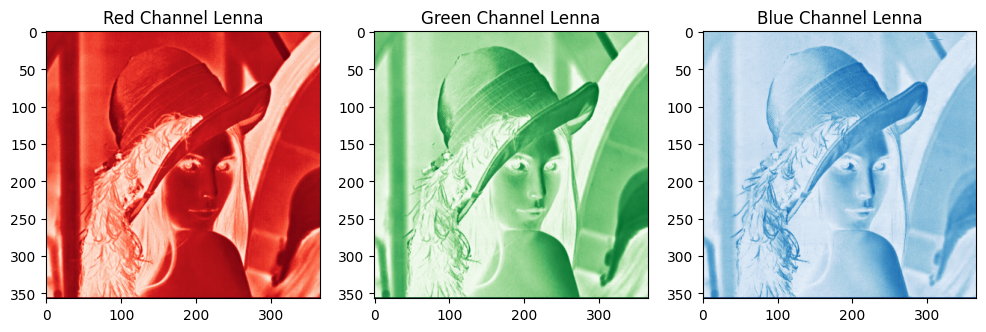

In [5]:
r, g, b = img_array[:, :, 0], img_array[:, :, 1], img_array[:, :, 2]
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(r, cmap='Reds')
plt.title("Red Channel Lenna")
plt.subplot(1, 3, 2)
plt.imshow(g, cmap='Greens')
plt.title("Green Channel Lenna")
plt.subplot(1, 3, 3)
plt.imshow(b, cmap='Blues')
plt.title("Blue Channel Lenna")
plt.show()

4. Modify the top 100x100 pixels to a value of 210 and display the resulting image

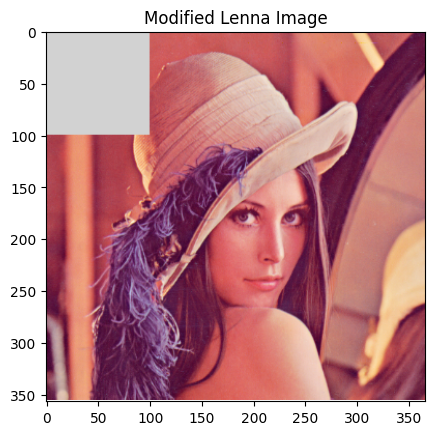

In [6]:
img_array[:100, :100] = 210
modified_img = Image.fromarray(img_array)
plt.imshow(modified_img)
plt.title("Modified Lenna Image")
plt.show()


# Exercise 2: Grayscale Image Processing (cameraman.png)

1. Load and display the grayscale image

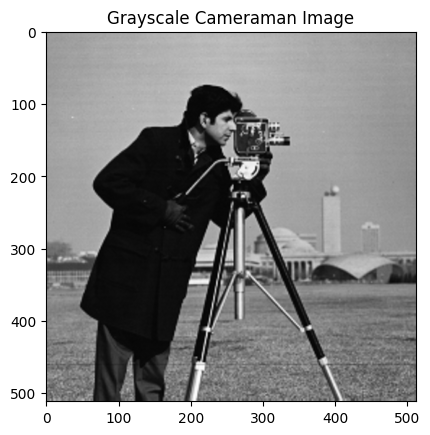

In [17]:
image_path = "cameraman.png"
gray_img = Image.open('/content/drive/MyDrive/Artificial Intelligence and Machine Learning./cameraman.png').convert('L')
gray_array = np.array(gray_img)
plt.imshow(gray_array, cmap='gray')
plt.title("Grayscale Cameraman Image")
plt.show()

 2. Extract the middle 150-pixel section

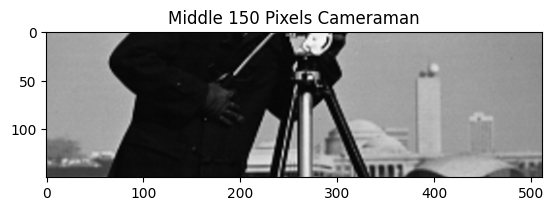

In [8]:
height = gray_array.shape[0]
middle_section = gray_array[height // 2 - 75:height // 2 + 75, :]
plt.imshow(middle_section, cmap='gray')
plt.title("Middle 150 Pixels Cameraman")
plt.show()

3. Apply a threshold

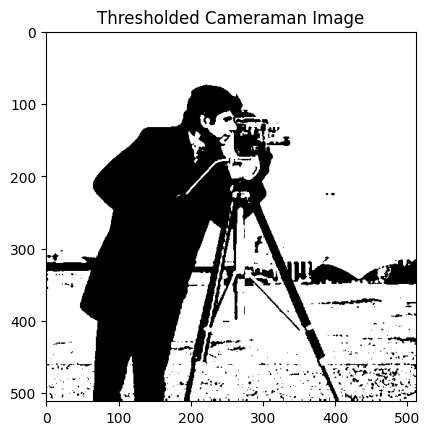

In [9]:
thresholded = np.where(gray_array < 100, 0, 255)
plt.imshow(thresholded, cmap='gray')
plt.title("Thresholded Cameraman Image")
plt.show()

4. Rotate the image 90 degrees clockwise

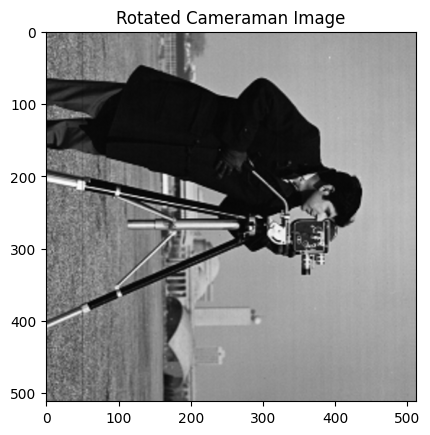

In [34]:
rotated_img = gray_img.rotate(-90)
plt.imshow(rotated_img, cmap='gray')
plt.title("Rotated Cameraman Image")
plt.show()

5. Convert to RGB

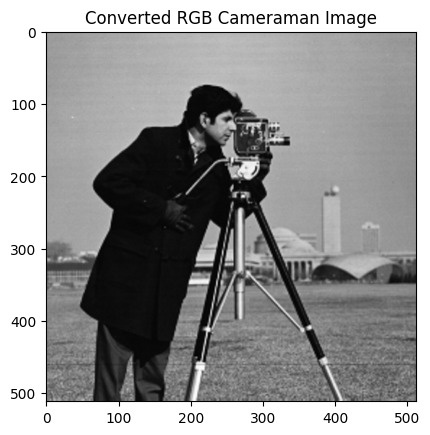

In [35]:
rgb_array = np.stack((gray_array,) * 3, axis=-1)
plt.imshow(rgb_array)
plt.title("Converted RGB Cameraman Image")
plt.show()

# Exercise 3: Image Compression and Decompression using PCA (lenna_image.png)

1. Load and Prepare Data

In [14]:
img = Image.open("/content/drive/MyDrive/Artificial Intelligence and Machine Learning./lenna_image.png").convert('L')
img_array = np.array(img).astype('float64')
mean = np.mean(img_array, axis=0)
centered = img_array - mean
std_dev = np.std(centered, axis=0)
standardized = centered / std_dev
covariance_matrix = np.cov(standardized.T)

 2. Eigen Decomposition and Identifying Principal Components

/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


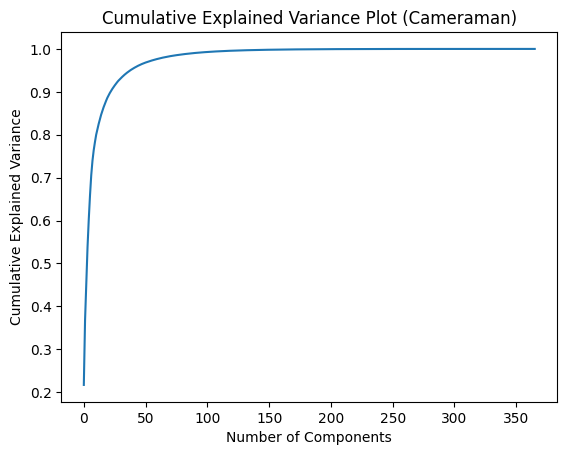

In [22]:
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]
cumulative_variance = np.cumsum(sorted_eigenvalues) / np.sum(sorted_eigenvalues)
plt.plot(cumulative_variance)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance Plot (Cameraman)')
plt.show()

3. Reconstruction and Experiment

<ipython-input-33-56303f6e9b77>:6: ComplexWarning: Casting complex values to real discards the imaginary part
  return reconstructed_image.astype(np.uint8)


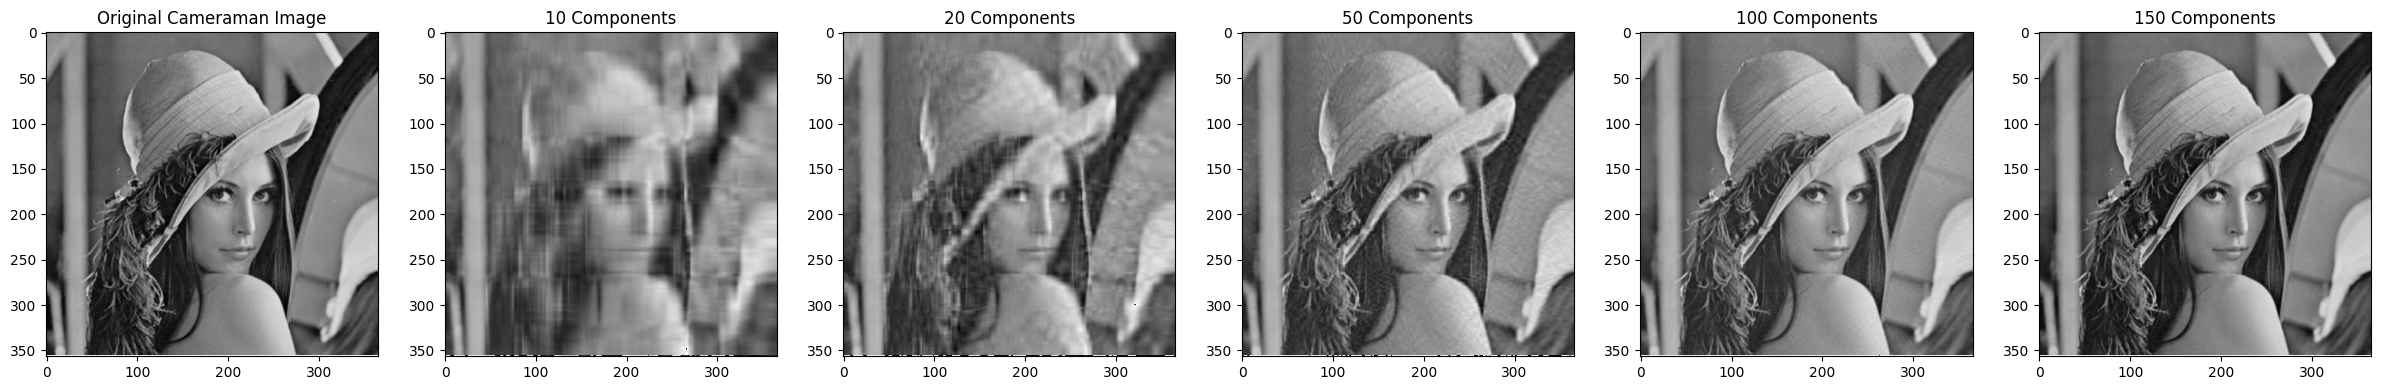

In [33]:
def reconstruct_image(data, eigenvectors, mean, std_dev, k):
    reduced_eigenvectors = eigenvectors[:, :k]
    reduced_data = np.dot(data, reduced_eigenvectors)
    reconstructed_data = np.dot(reduced_data, reduced_eigenvectors.T)
    reconstructed_image = (reconstructed_data * std_dev) + mean
    return reconstructed_image.astype(np.uint8)

k_values = [10, 20, 50, 100, 150]
plt.figure(figsize=(30, 30))
plt.subplot(1, len(k_values) + 1, 1)
plt.imshow(img_array.astype(np.uint8), cmap='gray')
plt.title('Original Cameraman Image')
for i, k in enumerate(k_values):
    reconstructed = reconstruct_image(standardized, sorted_eigenvectors, mean, std_dev, k)
    plt.subplot(1, len(k_values) + 1, i + 2)
    plt.imshow(reconstructed, cmap='gray')
    plt.title(f'{k} Components')
plt.show()